### Before you start

- Deadline - 144 hours after the classes
- Some of the tasks require implementation - fill in empty functions.
- Some of the tasks require answering questions - answer them in Markdowns
- The number of points for the given task is next to the command

In [1]:
import networkx as nx
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

### Task 1 - graphs definition [4p]

Prepare some graphs with the networkx library as described. Show:
- list of nodes
- adjacency matrix
- draw a graph

**a) *Random* graph: [1p]**

- 10 nodes
- 25 randomly chosen edges (including edges from node to itself)
- *connected* (looking at the structure if it were an undirected graph; it is not necessary to create a connection between each pair of nodes)
- set a random seed to be reproducible

In [17]:
random.seed(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[0 0 0 0 1 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 1]
 [0 0 0 1 0 1 0 1 0 0]
 [1 0 1 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 1]]


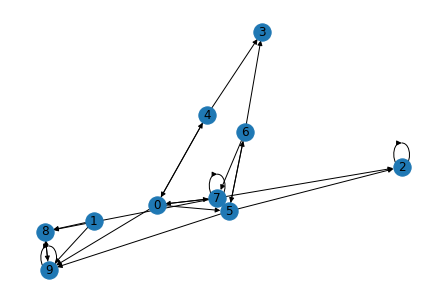

In [4]:
# My personal method: 
G_random = nx.DiGraph()
nodes = list(range(0,10))
G_random.add_nodes_from(nodes)
for x in range(0, 25):
    G_random.add_edge(*random.choices(nodes, k=2))

print(G_random.nodes)
print(nx.adjacency_matrix(G_random).todense())
nx.draw(G_random, with_labels=True)

# G_random = nx.generators.directed.random_k_out_graph(10, 2,alpha=0.5, self_loops=False)
# print(G_random.nodes)
# print(nx.adjacency_matrix(G_random).todense())
# nx.draw(G_random, with_labels=True)

**b) *Spider-trap* graph: [1p]**

- at least 5 nodes
- at least 2 nodes in *spider-trap(s)* (2 separate *traps* or 1 *trap* with 2 nodes)

[0, 1, 2, 3, 4]
[[0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 1 0]]


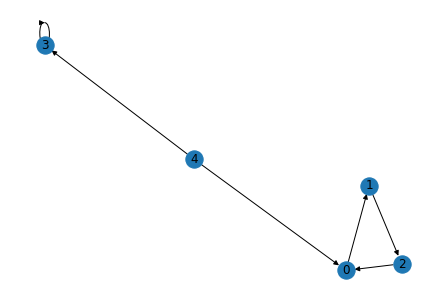

In [70]:
U = nx.DiGraph()
nodes = list(range(3,5))
U.add_nodes_from(nodes)
for x in range(0, 3):
    U.add_edge(*random.choices(nodes, k=2))

spider_trap = nx.generators.classic.cycle_graph(3, nx.DiGraph())
G_spidertrap = nx.DiGraph()
G_spidertrap.add_edges_from(list(spider_trap.edges(data=True))+ list(U.edges(data=True)))
G_spidertrap.add_nodes_from(list(spider_trap.nodes(data=True))+ list(U.nodes(data=True))) #deals with isolated nodes
G_spidertrap.add_edge(random.choice(nodes), 0)

print(G_spidertrap.nodes)
print(nx.adjacency_matrix(G_spidertrap).todense())
nx.draw(G_spidertrap, with_labels=True)

**c) *Death-end* graph: [1p]**

- at least 5 nodes
- 1 or 2 nodes as a *death-end*

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[[0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


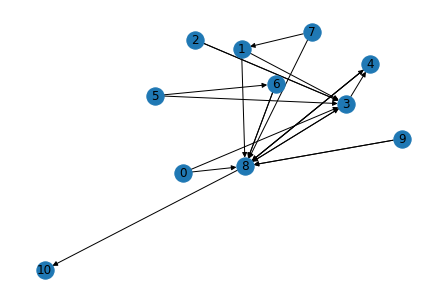

In [5]:
# More naive solution
# num_of_nodes = 7
# G_deathend = nx.DiGraph()
# nodes = list(range(0,num_of_nodes))
# G_deathend.add_nodes_from(nodes)
# for x in range(0, num_of_nodes+4):
#     G_deathend.add_edge(*random.choices(nodes, k=2))
    
# G_deathend.add_node(num_of_nodes) 
# G_deathend.add_edge(random.choice(nodes), num_of_nodes)
    
# print(G_deathend.nodes)
# print(nx.adjacency_matrix(G_deathend).todense())
# nx.draw(G_deathend, with_labels=True)

N = 10
G_deathend = nx.generators.directed.random_k_out_graph(N, 2,alpha=0.25, self_loops=False)
G_deathend.add_node(N) 
G_deathend.add_edge(random.choice(nodes), N) #Adding death_end

print(G_deathend.nodes)
print(nx.adjacency_matrix(G_deathend).todense())
nx.draw(G_deathend, with_labels=True)

**d) *Fully-connected* graph: [1p]**

- at least 5 nodes (8 is drawn nicely)
- *every node to every node* connections (except from node to itself)

[0, 1, 2, 3, 4, 5, 6, 7]
[[0 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1]
 [1 1 1 0 1 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 0]]


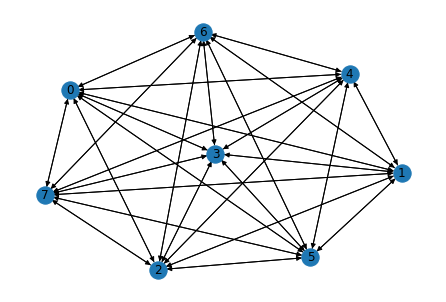

In [6]:
N=8
G_fullyconnected = nx.complete_graph(N, nx.DiGraph())
print(G_fullyconnected.nodes)
print(nx.adjacency_matrix(G_fullyconnected).todense())
nx.draw(G_fullyconnected, with_labels=True)

### Task 2 - PageRank algorithm implementation [10p]

Two approaches to the PageRank algorithm.

Below is a reference function from the *networkx* package to verify the operation of the implemented functions

In [86]:
def networkx_pagerank(graph: nx.DiGraph, alpha: float = 0.85) -> list:
    # graph - NetworkX Graph
    # alpha - damping parameter (opposite to damping factor from the lecture presentation)
    
    # PageRank by networkx library
    pagerank = nx.pagerank(graph, alpha=alpha)

    # Sort dictionary by PageRank value
    pagerank_sorted = sorted(pagerank.items(), key=lambda v:(v[1],v[0]),reverse=True)
    return pagerank_sorted

networkx_pagerank(G_random)
# networkx_pagerank(G_deathend)

[(9, 0.3446957111789543),
 (2, 0.2475287817449899),
 (8, 0.1816352133511466),
 (7, 0.043527128715880214),
 (0, 0.03862922213298089),
 (3, 0.037279193072077985),
 (5, 0.03427738775650381),
 (6, 0.027880898923435107),
 (4, 0.026377675858030317),
 (1, 0.018168787266000963)]

**a) *Random walk* approach [5p]**

Create a function that will estimate the PageRank value for each node in the graph using the "Random walk" strategy

- Choose a random start node
- In each iteration, go to the next node in the graph (choose one of the neighbors randomly)
- If the algorithm reaches a *dead end*, go to a random node
- Count the occurrences of each node on the random walk (normalize at the end)
- Take into account the damping parameter *alpha* ($1 - \alpha$ - probability that in a given step the user will start browsing the web from a random page)
- Return the result in the same way as networkx_pagerank function - list of tuples sorted in descending order of PageRank value: (node_name, node_pagerank_value)
- Verify the method for different *alpha* values and graphs (death end, spider trap, clique, random graph)

**Note** - for the sake of randomness, this result will be similar but not the same as in the *networkx_pagerank* function

In [87]:
def randomwalk_pagerank(graph: nx.DiGraph, alpha: float = 0.85) -> list:
    nodes = list(graph.nodes)
    my_node = random.choice(nodes)
    occurrences = {my_node: 1}
    for _ in range(0, 100000):
        if random.choices([True, False], k=1, weights=[1-alpha, alpha])[0]:
            my_node = random.choice(nodes)
            try:
                occurrences[my_node] = occurrences[my_node] + 1
            except KeyError:
                occurrences[my_node] = 1
                
        neighbours = list(graph.neighbors(my_node))
        if len(neighbours) == 0:
            my_node = random.choice(nodes)
        else:
            my_node = random.choice(neighbours)
        try:
            occurrences[my_node] = occurrences[my_node] + 1
        except KeyError:
            occurrences[my_node] = 1

    sum_of_occurrences = sum(occurrences.values())
    normalized_occurrences =  {key: value/sum_of_occurrences for key, value in occurrences.items()}
    list_of_sets = sorted(normalized_occurrences.items(), key=lambda v:(v[1],v[0]),reverse=True)
    nodes__ = [x[0] for x in list_of_sets] 
    list_of_sets  = list_of_sets + [(x, 0) for x in range(0, len(nodes)) if x not in nodes__]
    
    return list_of_sets

randomwalk_pagerank(G_spidertrap)
# randomwalk_pagerank(G_spidertrap)
# randomwalk_pagerank(G_deathend)
# randomwalk_pagerank(G_fullyconnected)

# assert [set_[0] for set_ in my_pagerank] == [set_[0] for set_ in networkx_pagerank(G_random)]
# randomwalk_pagerank(G_random)
# nx.draw(G_random, with_labels=True)

[(3, 0.2736172763362492),
 (0, 0.23759305749802376),
 (1, 0.2334060130128478),
 (2, 0.22880200144201118),
 (4, 0.026581651710868074)]

**b) *Stochastic matrix* approach [5p]**

Create a function that will estimate the PageRank value for each of $N$ nodes in the graph using the stochastic adjacency matrix: $v = Mv$.

Using the damping parameter, in order to ensure normalization after each step, the formula changes as follows: $v = (1 - \alpha) \cdot v_{\text{start}} + \alpha \cdot Mv$, where $v_{\text{start}} = [\frac{1}{N}, \frac{1}{N}, \ldots, \frac{1}{N}]$.

- Start with $v = v_{\text{start}}$
- Normalize the adjacency matrix ($M$) so that each cell in the matrix determines the probability of going from $\text{node}_i$ to $\text{node}_j$
- At each iteration, update $v$ with a new vector $v' = Mv$
- Stop the algorithm when the difference between each pair of the PageRank values for the same node in consecutive $v$ and $v'$ vectors is less than the *epsilon* parameter
- Take into account the damping parameter *alpha* ($1 - \alpha$ - probability that in a given step the user will start browsing the web from a random page)
- Return the result in the same way as networkx_pagerank function - list of tuples sorted in descending order of PageRank value: (node_name, node_pagerank_value)
- Verify the method for different *alpha* values and graphs (death end, spider trap, clique, random graph)

**Hint** - for the *death ends* it is necessary to set the values in matrix to simulate the same behaviour as in the *random walk* approach (go to a random node)

In [84]:
def stochastic_matrix_pagerank(graph: nx.DiGraph, alpha: float = 0.85, epsilon: float = 0.0000001) -> list:
    nodes = list(graph.nodes)
    v_start = np.array([[1/len(nodes)] for x in range(0, len(nodes))])
    v = np.copy(v_start)
    M = nx.adjacency_matrix(graph).todense().T
    with np.errstate(divide='ignore', invalid='ignore'): # Some collumns contain only zeroes.
        M = M / np.sum(M, axis=0)# normalizing adjacency_matrix column wise
    M[np.isnan(M)] = 0
    for _ in range(0, 1000):

        new_v = ((1-alpha) * v_start) + (alpha * (M@v))

        # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
        # The Frobenius norm
        distance = np.linalg.norm(v - new_v, ord='fro')
        v = new_v
        if distance < epsilon:
#             print("When stopped:", _)
            break
    
    list_of_sets = [(nodes[index], value) for index, value in zip(range(0, len(v)), v.tolist())]
    list_of_sets = sorted(list_of_sets, key=lambda v:(v[1],v[0]), reverse=True)
    list_of_sets = [(index_, value[0]) for index_, value in list_of_sets]
    return list_of_sets
        
stochastic_matrix_pagerank(G_random)

[(9, 0.28458166470781493),
 (2, 0.20436064335578702),
 (8, 0.1499583533497734),
 (7, 0.035934840446560826),
 (0, 0.031891357067796354),
 (3, 0.030776955949022782),
 (5, 0.02829867929191183),
 (6, 0.023017964600321433),
 (4, 0.021776919256036413),
 (1, 0.015000000000000003)]

### Test the functions

GRAPH_NAME: G_random


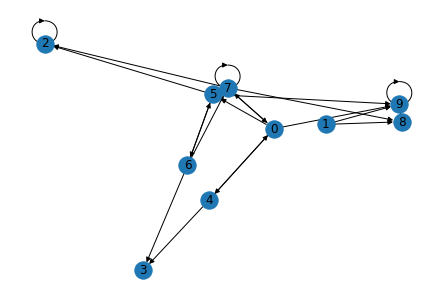

ALPHA: 0.25
(9, 0.14660305465698814) (9, 0.20784181424152148) (9, 0.14211008366377412)
(2, 0.12122324851423236) (2, 0.14670379625235158) (2, 0.11750809824034701)
(8, 0.1113885662533455) (8, 0.12704493861610333) (8, 0.10797479312051861)
(7, 0.09632884971889345) (7, 0.09226740163423545) (7, 0.09337654152543057)
(3, 0.09485021971078332) (3, 0.08796738390809855) (3, 0.09194324471091524)
(0, 0.09379603418397145) (0, 0.08677801730299686) (0, 0.0909213588165931)
(5, 0.09030827962728871) (5, 0.07704579633240509) (5, 0.08754050662649013)
(6, 0.08489696384903812) (6, 0.06464893671769126) (6, 0.0822950429257248)
(4, 0.08323352400887211) (4, 0.06194427131282057) (4, 0.08068258583322756)
(1, 0.07737125947658695) (1, 0.04775764368177582) (1, 0.07500000000000001)
ALPHA: 0.5
(9, 0.20702376658748195) (9, 0.24527886986073166) (9, 0.19147630257894827)
(2, 0.15471376903932102) (2, 0.17189311654561204) (2, 0.14309487693585418)
(8, 0.1300834495970505) (8, 0.1408076231092157) (8, 0.12031404723383751)
(7, 0.0

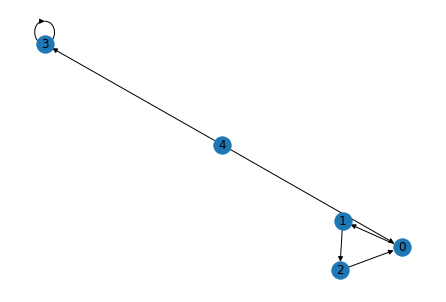

ALPHA: 0.25
(3, 0.22500000000000003) (3, 0.2573631536531416) (3, 0.22500000000000003)
(0, 0.21904754638671878) (0, 0.24446298847158476) (0, 0.21904761791229252)
(1, 0.2047622680664063) (1, 0.2104435896410016) (1, 0.20476191043853764)
(2, 0.20119018554687504) (2, 0.20299041489720449) (2, 0.20119047164916995)
(4, 0.15000000000000002) (4, 0.08473985333706754) (4, 0.15000000000000002)
ALPHA: 0.5
(3, 0.25) (3, 0.26762730833799664) (3, 0.25)
(0, 0.22857208251953126) (0, 0.2367828496815626) (0, 0.22857141494750977)
(1, 0.21428527832031252) (1, 0.21851600181202868) (1, 0.2142857074737549)
(2, 0.20714263916015627) (2, 0.20938923974738188) (2, 0.20714287757873537)
(4, 0.1) (4, 0.0676846004210302) (4, 0.1)
ALPHA: 0.7
(3, 0.27) (3, 0.27856839831848507) (3, 0.27)
(0, 0.23196274988410032) (0, 0.23503413166724518) (0, 0.23196350491551992)
(1, 0.2223739249188702) (1, 0.2236491958810598) (1, 0.22237440887322357)
(2, 0.21566332519702952) (2, 0.21730880481314357) (2, 0.2156620862112565)
(4, 0.06000000000

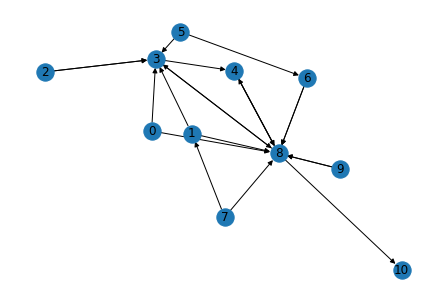

ALPHA: 0.25
(8, 0.17620561144732383) (8, 0.2848531596388984) (8, 0.17136195608060367)
(3, 0.12970648118520486) (3, 0.17938521311850075) (3, 0.12614095982009446)
(4, 0.1010056272970451) (4, 0.11497543137927094) (4, 0.0982296033171826)
(10, 0.08479270878688391) (10, 0.07760255970746201) (10, 0.08246198254736718)
(6, 0.07887256132204089) (1, 0.06343846417552279) (6, 0.07670454545454544)
(1, 0.07887256132204089) (6, 0.0630442235173123) (1, 0.07670454545454544)
(9, 0.07010888972789209) (5, 0.043635013141355275) (9, 0.06818181818181818)
(7, 0.07010888972789209) (9, 0.04350359958861844) (7, 0.06818181818181818)
(5, 0.07010888972789209) (7, 0.04345217689406925) (5, 0.06818181818181818)
(2, 0.07010888972789209) (2, 0.043377899668609304) (2, 0.06818181818181818)
(0, 0.07010888972789209) (0, 0.04273225917038053) (0, 0.06818181818181818)
ALPHA: 0.5
(8, 0.2499813626029318) (8, 0.30272417707150967) (8, 0.22907430626203895)
(3, 0.15637018069946235) (3, 0.1787207050811244) (3, 0.1432926936449293)
(4, 

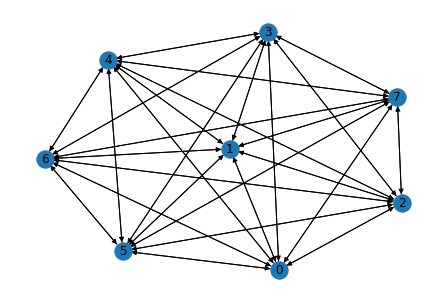

ALPHA: 0.25
(7, 0.125) (7, 0.12581539604950975) (7, 0.125)
(6, 0.125) (4, 0.12558671354657977) (6, 0.125)
(5, 0.125) (5, 0.1253751822313695) (5, 0.125)
(4, 0.125) (2, 0.12524940685475802) (4, 0.125)
(3, 0.125) (0, 0.12495783666352228) (3, 0.125)
(2, 0.125) (6, 0.1244089986564903) (2, 0.125)
(1, 0.125) (1, 0.1243403939056113) (1, 0.125)
(0, 0.125) (3, 0.12426607209215905) (0, 0.125)
ALPHA: 0.5
(7, 0.12499999999999999) (4, 0.1254459017049281) (7, 0.125)
(6, 0.12499999999999999) (6, 0.12537922481447156) (6, 0.125)
(5, 0.12499999999999999) (1, 0.1253725571254259) (5, 0.125)
(4, 0.12499999999999999) (5, 0.1252858771678324) (4, 0.125)
(3, 0.12499999999999999) (3, 0.12517919414310194) (3, 0.125)
(2, 0.12499999999999999) (7, 0.12471912359895183) (2, 0.125)
(1, 0.12499999999999999) (2, 0.12445241603712569) (1, 0.125)
(0, 0.12499999999999999) (0, 0.12416570540816259) (0, 0.125)
ALPHA: 0.7
(7, 0.12499999999999999) (3, 0.12644790610501735) (7, 0.125)
(6, 0.12499999999999999) (1, 0.1258564537438166

In [85]:
names = ['G_random','G_spidertrap' , 'G_deathend', 'G_fullyconnected'] #, 'G_spidertrap'
graphs = [G_random, G_spidertrap, G_deathend, G_fullyconnected] # , G_spidertrap

for name, graph in zip(names, graphs):
    print("==================")
    print("GRAPH_NAME:", name)
    nx.draw(graph, with_labels=True)
    plt.show()
    
    for alpha in [0.25, 0.5, 0.7, 0.85, 1.0]:
        print('ALPHA:', alpha)
        try:
            nx_res = networkx_pagerank(graph, alpha)
        # Networkx_pagerank crushes with alpha = 1 for G_spidertrap graph, possibly due to spider trap.
        except: #PowerIterationFailedConvergence:
            nx_res = ["PowerIterationFailedConvergence" for x in range(len(list(graph.nodes)))]
        rw_res = randomwalk_pagerank(graph, alpha)
        sm_res = stochastic_matrix_pagerank(graph, alpha)
        for nx_node, rw_node, sm_node in zip(nx_res, rw_res, sm_res):
            print(nx_node, rw_node, sm_node)

### Use-case - Catan fandom Wikipedia

The scripts used for scraping are in the *scraper.ipynb* file.

Pages come from Fandom Wikipedia: https://catan.fandom.com/wiki/Main_Page

In [27]:
with open('catan_links.pickle', 'rb') as handle:
    d = pickle.load(handle)

G_catan = nx.DiGraph(d)

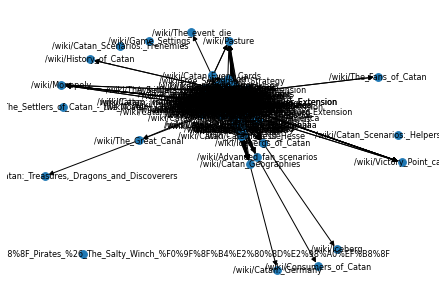

In [28]:
nx.draw(G_catan, with_labels=True, node_size=60, font_size=8)

In [29]:
networkx_pagerank(G_catan)

[('/wiki/The_Settlers_of_Catan', 0.09532314219412437),
 ('/wiki/Catan:_Seafarers', 0.03349508715460648),
 ('/wiki/Catan:_Traders_%26_Barbarians', 0.03172935659245708),
 ('/wiki/City', 0.028254309909030387),
 ('/wiki/Scenario', 0.027629072895623535),
 ('/wiki/Catan:_Cities_%26_Knights', 0.025537852533458884),
 ('/wiki/Mayfair_Games', 0.025172959397811705),
 ('/wiki/Settlement', 0.024073918573428183),
 ('/wiki/Kosmos', 0.023411212689086826),
 ('/wiki/Klaus_Teuber', 0.022253005140779884),
 ('/wiki/Resource_card', 0.022187820545084905),
 ('/wiki/Catan', 0.021618848127220012),
 ('/wiki/The_Settlers_of_Catan_5-6_Player_Extension', 0.017028602460957998),
 ('/wiki/Fishermen_of_Catan', 0.014629434349042052),
 ('/wiki/Catan:_Explorers_%26_Pirates', 0.012914584660461132),
 ('/wiki/Brick', 0.01244668075788728),
 ('/wiki/Lumber', 0.012381957990526396),
 ('/wiki/Development_card', 0.012272904956320042),
 ('/wiki/Out_of_the_Box', 0.011480202090563354),
 ('/wiki/Traders_%26_Barbarians', 0.011319237583

### Review subgraphs

('/wiki/The_Settlers_of_Catan', 0.16341649050253457)
('/wiki/City', 0.11359731125157921)
('/wiki/Road', 0.05918516713218233)
('/wiki/Resource_hex', 0.056299843140026964)
('/wiki/Catan', 0.04746345403132357)
('/wiki/Brick', 0.04283496737472926)
('/wiki/Lumber', 0.04196514046830725)
('/wiki/Forest', 0.036902910875925427)
('/wiki/Development_card', 0.03566398068462476)
('/wiki/Hill', 0.0336158122329555)
('/wiki/Mountain', 0.030816823052154357)
('/wiki/Field', 0.030816823052154357)
('/wiki/Grain', 0.029663770725438132)
('/wiki/Ore', 0.02966377072543813)
('/wiki/Ship', 0.02879580458508869)
('/wiki/Pasture', 0.028442817411593914)
('/wiki/Knight_card', 0.024450387815589485)
('/wiki/Wool', 0.023115183858690554)
('/wiki/Desert', 0.02311461681933932)
('/wiki/Longest_Road', 0.019682097651882523)
('/wiki/Hex', 0.014803150966327476)
('/wiki/Paper', 0.012366006163784795)
('/wiki/Gold_Field', 0.01147847798616387)
('/wiki/Harbor_settlement', 0.009344680212459266)
('/wiki/Harbor', 0.008126940722244097)

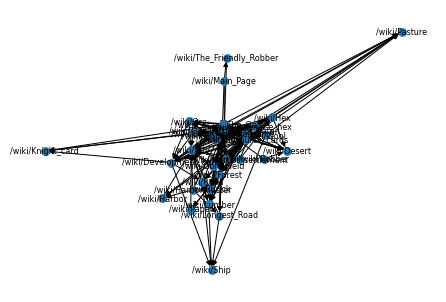

In [30]:
interesting_pages = [
    '/wiki/City', '/wiki/Knight_card', '/wiki/Robber', '/wiki/Desert', '/wiki/Harbor', '/wiki/Pasture',
    '/wiki/Paper', '/wiki/Ship', '/wiki/The_Friendly_Robber', '/wiki/Longest_Road', '/wiki/Brick', 
    '/wiki/Grain', '/wiki/Ore', '/wiki/Field', '/wiki/Hill', '/wiki/Lumber', '/wiki/Wool', 
    '/wiki/Harbor_settlement', '/wiki/Road', '/wiki/Forest', '/wiki/Gold_Field', '/wiki/Mountain', 
    '/wiki/Harbormaster', '/wiki/Hex', '/wiki/Main_Page', '/wiki/Resource', '/wiki/Resource_cards', 
    '/wiki/Development_card', '/wiki/Resource_hex', '/wiki/Catan', '/wiki/Catan:_The_Game', '/wiki/The_Settlers_of_Catan'
]

G_sub_catan = G_catan.subgraph(interesting_pages)

for t in networkx_pagerank(G_sub_catan):
    print(t)
    
nx.draw(G_sub_catan, with_labels=True, node_size=60, font_size=8) 

### Task 3 - Analysis of the subset of pages about building costs [4p]

<img src="catan_building_costs.jpg" alt="drawing" width="500"/>

/wiki/Development_card  /wiki/Settlement  /wiki/Brick  \
/wiki/Development_card                       0                 0            0   
/wiki/Settlement                             0                 0            1   
/wiki/Brick                                  0                 1            0   
/wiki/Road                                   0                 1            1   
/wiki/Wool                                   1                 1            0   
/wiki/Ore                                    1                 1            0   
/wiki/Grain                                  1                 1            0   
/wiki/Lumber                                 0                 1            0   
/wiki/City                                   0                 0            0   

                        /wiki/Road  /wiki/Wool  /wiki/Ore  /wiki/Grain  \
/wiki/Development_card           1           0          0            0   
/wiki/Settlement                 0           1          1            1   
/wiki/Brick                      1           0          0            0   
/wiki/Road                       0           0          0            0   
/wiki/Wool                       0           0          0            0   
/wiki/Ore                        0           0          0            0   
/wiki/Grain                      0           0          0            0   
/wiki/Lumber                     1           0          0            0   
/wiki/City                       0           0          0            0   

                        /wiki/Lumber  /wiki/City  
/wiki/Development_card             0           0  
/wiki/Settlement                   1           1  
/wiki/Brick                        0           1  
/wiki/Road                         1           1  
/wiki/Wool                         0           1  
/wiki/Ore                          0           1  
/wiki/Grain                        0           1  
/wiki/Lumber                       0           1  
/wiki/City                         0           0

('/wiki/City', 0.20085746141355568)
('/wiki/Settlement', 0.1759333697951493)
('/wiki/Road', 0.16371476308045152)
('/wiki/Lumber', 0.0953497433194973)
('/wiki/Brick', 0.0953497433194973)
('/wiki/Development_card', 0.08711274778232866)
('/wiki/Wool', 0.06056072376317328)
('/wiki/Ore', 0.06056072376317328)
('/wiki/Grain', 0.06056072376317328)


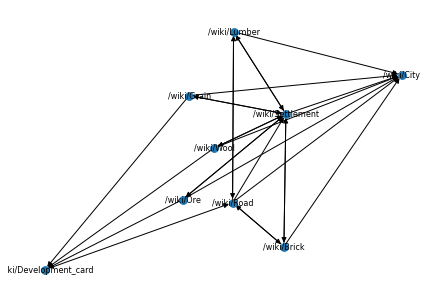

In [31]:
interesting_pages = [
    '/wiki/Lumber', '/wiki/Brick', '/wiki/Wool', '/wiki/Grain', '/wiki/Ore', # Resources
    '/wiki/Road', '/wiki/Settlement', '/wiki/City', '/wiki/Development_card' # Buildings (and "build-able card")
]

G_sub_buildings = G_catan.subgraph(interesting_pages)

display(pd.DataFrame(nx.adjacency_matrix(G_sub_buildings).todense(), index=list(G_sub_buildings.nodes), columns=list(G_sub_buildings.nodes)))

for t in networkx_pagerank(G_sub_buildings):
    print(t)
    
nx.draw(G_sub_buildings, with_labels=True, node_size=60, font_size=8) 

**Answer the questions:**

1. [2p] What is the difference between *City* and *Settlement* in the context of PageRank determination?
2. [2p] Why do *Lumber* and *Brick* score higher than other resources (*Wool*, *Ore*, *Grain*)?

1. Both City and Settlement are the pages that most pages link to, thus their pageranks are high, nevertheless pagerank of city is higher, becuase settlement links to the City further increasing it's pagerank. Also City is a deathend, which further increases it's pagerank. 
2. Page Settlement links to all of the resources, for Wool, Ore, Grain Settlement is the only page that links to them, but to Lumber and Brick links additional page (Road), increasing their pageranks. 

### Task 4 - Analysis of the subset of pages about resources and hexes [5p]

<img src="catan_hexes_resources.jpg" alt="drawing" width="500"/>

/wiki/Mountain  /wiki/Pasture  /wiki/Forest  /wiki/Hill  \
/wiki/Mountain                    0              0             0           0   
/wiki/Pasture                     0              0             0           0   
/wiki/Forest                      0              0             0           0   
/wiki/Hill                        0              0             0           0   
/wiki/Hex                         1              1             1           1   
/wiki/Brick                       0              0             0           1   
/wiki/Field                       0              0             0           0   
/wiki/Wool                        0              1             0           0   
/wiki/Ore                         1              0             0           0   
/wiki/Grain                       0              0             0           0   
/wiki/Resource_card               1              1             1           1   
/wiki/Lumber                      0              0             1           0   

                     /wiki/Hex  /wiki/Brick  /wiki/Field  /wiki/Wool  \
/wiki/Mountain               0            0            0           0   
/wiki/Pasture                0            0            0           0   
/wiki/Forest                 0            0            0           0   
/wiki/Hill                   0            1            0           0   
/wiki/Hex                    0            0            1           0   
/wiki/Brick                  0            0            0           0   
/wiki/Field                  0            0            0           0   
/wiki/Wool                   0            0            0           0   
/wiki/Ore                    0            0            0           0   
/wiki/Grain                  0            0            1           0   
/wiki/Resource_card          0            1            1           1   
/wiki/Lumber                 0            0            0           0   

                     /wiki/Ore  /wiki/Grain  /wiki/Resource_card  /wiki/Lumber  
/wiki/Mountain               1            0                    0             0  
/wiki/Pasture                0            0                    0             0  
/wiki/Forest                 0            0                    0             1  
/wiki/Hill                   0            0                    0             0  
/wiki/Hex                    0            0                    0             0  
/wiki/Brick                  0            0                    0             0  
/wiki/Field                  0            1                    0             0  
/wiki/Wool                   0            0                    0             0  
/wiki/Ore                    0            0                    0             0  
/wiki/Grain                  0            0                    0             0  
/wiki/Resource_card          1            1                    0             1  
/wiki/Lumber                 0            0                    0             0

('/wiki/Mountain', 0.11595688112863076)
('/wiki/Hill', 0.11595688112863076)
('/wiki/Forest', 0.11595688112863076)
('/wiki/Field', 0.11595688112863076)
('/wiki/Ore', 0.11460003945855037)
('/wiki/Lumber', 0.11460003945855037)
('/wiki/Grain', 0.11460003945855037)
('/wiki/Brick', 0.11460003945855037)
('/wiki/Pasture', 0.03217820867618207)
('/wiki/Wool', 0.016035529412634076)
('/wiki/Resource_card', 0.014779289781229565)
('/wiki/Hex', 0.014779289781229565)


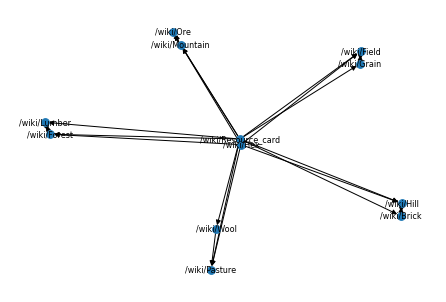

In [32]:
interesting_pages = [
    '/wiki/Hex', '/wiki/Resource_card', # A place from which to get a resource, Resource
    '/wiki/Forest', '/wiki/Lumber', 
    '/wiki/Hill', '/wiki/Brick',
    '/wiki/Pasture', '/wiki/Wool', 
    '/wiki/Field', '/wiki/Grain', 
    '/wiki/Mountain', '/wiki/Ore',
]

G_sub_res = G_catan.subgraph(interesting_pages)

display(pd.DataFrame(nx.adjacency_matrix(G_sub_res).todense(), index=list(G_sub_res.nodes), columns=list(G_sub_res.nodes)))

for t in networkx_pagerank(G_sub_res):
    print(t)

nx.draw(G_sub_res, with_labels=True, node_size=60, font_size=8) 

**Answer the questions:**

1. [2p] Why are the PageRank values for the *Pasture-Wool* pair lower than for the rest of the resource pairs (e.g., *Mountain-Ore*)? What changes would make them have comparable grades?
2. [3p] Replace *'/wiki/Hex'* with *'/wiki/Resource_hex'*. Try to explain why PageRank values changed a lot for each group of pages.

1. Pasture doesn't link back to Wool. I would add edge from Pasture to Wool. On the other hand other pairs links to each other respectively. 

/wiki/Mountain  /wiki/Pasture  /wiki/Forest  /wiki/Hill  \
/wiki/Mountain                    0              0             0           0   
/wiki/Pasture                     0              0             0           0   
/wiki/Forest                      0              0             0           0   
/wiki/Hill                        0              0             0           0   
/wiki/Brick                       0              0             0           1   
/wiki/Resource_hex                1              1             1           1   
/wiki/Field                       0              0             0           0   
/wiki/Wool                        0              1             0           0   
/wiki/Ore                         1              0             0           0   
/wiki/Grain                       0              0             0           0   
/wiki/Resource_card               1              1             1           1   
/wiki/Lumber                      0              0             1           0   

                     /wiki/Brick  /wiki/Resource_hex  /wiki/Field  /wiki/Wool  \
/wiki/Mountain                 0                   1            0           0   
/wiki/Pasture                  0                   0            0           0   
/wiki/Forest                   0                   1            0           0   
/wiki/Hill                     1                   1            0           0   
/wiki/Brick                    0                   0            0           0   
/wiki/Resource_hex             1                   0            1           1   
/wiki/Field                    0                   1            0           0   
/wiki/Wool                     0                   0            0           0   
/wiki/Ore                      0                   0            0           0   
/wiki/Grain                    0                   0            1           0   
/wiki/Resource_card            1                   0            1           1   
/wiki/Lumber                   0                   0            0           0   

                     /wiki/Ore  /wiki/Grain  /wiki/Resource_card  /wiki/Lumber  
/wiki/Mountain               1            0                    0             0  
/wiki/Pasture                0            0                    0             0  
/wiki/Forest                 0            0                    0             1  
/wiki/Hill                   0            0                    0             0  
/wiki/Brick                  0            0                    0             0  
/wiki/Resource_hex           1            1                    1             1  
/wiki/Field                  0            1                    0             0  
/wiki/Wool                   0            0                    0             0  
/wiki/Ore                    0            0                    0             0  
/wiki/Grain                  0            0                    0             0  
/wiki/Resource_card          1            1                    0             1  
/wiki/Lumber                 0            0                    0             0

('/wiki/Resource_hex', 0.18265651982534523)
('/wiki/Forest', 0.09749611016973078)
('/wiki/Mountain', 0.09749611016973077)
('/wiki/Hill', 0.09749611016973077)
('/wiki/Field', 0.09749611016973077)
('/wiki/Ore', 0.07509881832201001)
('/wiki/Lumber', 0.07509881832201001)
('/wiki/Grain', 0.07509881832201001)
('/wiki/Brick', 0.07509881832201001)
('/wiki/Pasture', 0.06227598599542805)
('/wiki/Wool', 0.03366248777293094)
('/wiki/Resource_card', 0.031025292439332382)


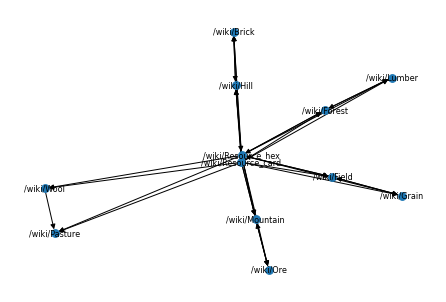

In [61]:
#2. 
interesting_pages = [
    '/wiki/Resource_hex', '/wiki/Resource_card', # A place from which to get a resource, Resource
    '/wiki/Forest', '/wiki/Lumber', 
    '/wiki/Hill', '/wiki/Brick',
    '/wiki/Pasture', '/wiki/Wool', 
    '/wiki/Field', '/wiki/Grain', 
    '/wiki/Mountain', '/wiki/Ore',
]

G_sub_res = G_catan.subgraph(interesting_pages)

display(pd.DataFrame(nx.adjacency_matrix(G_sub_res).todense(), index=list(G_sub_res.nodes), columns=list(G_sub_res.nodes)))

for t in networkx_pagerank(G_sub_res):
    print(t)

nx.draw(G_sub_res, with_labels=True, node_size=60, font_size=8) 

2. All resources hexes point to Resource _hex,  thus it has a high pagerank (the highest), furthermore  the Resource_hex page links to all resource hexes elevating their pageranks. 

### Use-case - Tram stops graph in Poznań

The scripts used for scraping are in the *scraper.ipynb* file.

Connections between the tram stops come from ZTM Poznań webpage: https://www.ztm.poznan.pl/pl/rozklad-jazdy

In [34]:
with open('tram_stops.pickle', 'rb') as handle:
    d = pickle.load(handle)

G_tram = nx.DiGraph(d)

['Junikowo', 'Cmentarna', 'Grotkowska', 'Budziszyńska', 'Rondo Skubiszewskiego', 'Węgorka', 'Stadion Miejski', 'Drzewieckiego', 'Grochowska', 'Ostroroga', 'Rondo Nowaka-Jeziorańskiego', 'Arena', 'Arciszewskiego', 'Głogowska/Hetmańska', 'Kolejowa', 'Traugutta', 'Rolna', 'Hetmańska Wiadukt', 'Rondo Starołęka', 'Rondo Żegrze', 'Żegrze I', 'Żegrze II', 'Żegrze III', 'Os. Czecha', 'Piaśnicka Rynek', 'Piaśnicka/Kurlandzka', 'Szwedzka', 'Szwajcarska', 'Franowo', 'Ogrody', 'Żeromskiego', 'Polna', 'Rynek Jeżycki', 'Kraszewskiego', 'Stare Zoo', 'Most Dworcowy', 'Poznań Główny', 'Wierzbięcice', 'Św. Czesława', 'Rynek Wildecki', 'Kosińskiego', 'Pamiątkowa', 'HCP', 'Wspólna', 'Dębiec PKM', 'Lechicka/Naramowicka', 'Włodarska', 'Serbska', 'Wilczak', 'Przełajowa', 'Kmieca', 'Pasieka', 'Żniwna', 'Armii Poznań', 'Wielkopolska', 'Poznańska', 'Most Teatralny', 'Fredry', 'Pl. Ratajskiego', 'Pl. Wielkopolski', 'Małe Garbary', 'Katedra', 'Rondo Śródka', 'Baraniaka', 'Kórnicka', 'Polanka', 'Os. Tysiąclecia', 

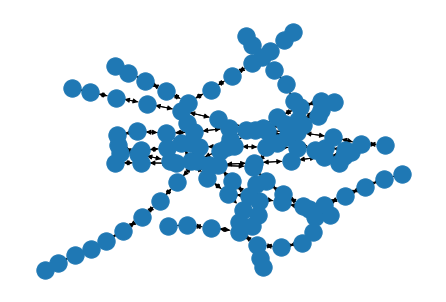

In [35]:
print(G_tram.nodes)
nx.draw(G_tram)


interesting_stops = [
    'Most Teatralny', 'Fredry', 'Pl. Ratajskiego', 'Pl. Wielkopolski', 'Małe Garbary', 
    'Katedra', 'Rondo Śródka', 'Św. Michała', 'Baraniaka', 'Kórnicka', 'Politechnika', 
    'Most Św. Rocha', 'Pl. Bernardyński', 'Wrocławska', 'Łąkowa', 'Polanka'
]

interesting_stops = [
    'Ogrody', 'Żeromskiego', 'Polna', 'Rynek Jeżycki', 'Kraszewskiego', 'Stare Zoo', 'Most Dworcowy',
    'Bałyk', 'Rondo Kaponiera', 'Bukowska', 'Matejki', 'Wojskowa', 'Ostroroga', 'Rondo Nowaka-Jeziorańskiego', 
    'Arena', 'Most Teatralny'
]

### Task 5 - Test tram stops PageRank with different alpha values [2p]

In [48]:
for alpha in [0.0, 0.25, 0.5, 0.75, 0.9, 0.999]:
    print('ALPHA:', alpha)
    for tram_stop in stochastic_matrix_pagerank(G_tram, alpha)[:5]:
        print(tram_stop)

ALPHA: 0.0
When stopped: 0
('Żniwna', [0.008264462809917356])
('Żeromskiego', [0.008264462809917356])
('Żegrze III', [0.008264462809917356])
('Żegrze II', [0.008264462809917356])
('Żegrze I', [0.008264462809917356])
ALPHA: 0.25
When stopped: 8
('Rondo Nowaka-Jeziorańskiego', [0.010917870256123365])
('Rondo Śródka', [0.010830965162368675])
('Most Teatralny', [0.010316131649928485])
('Kórnicka', [0.010076914910966862])
('Głogowska/Hetmańska', [0.010073553541291247])
ALPHA: 0.5
When stopped: 16
('Rondo Nowaka-Jeziorańskiego', [0.012812086120624795])
('Rondo Śródka', [0.012652620062156457])
('Most Teatralny', [0.01218679855606146])
('Kórnicka', [0.011584479730841216])
('Rondo Starołęka', [0.011571888277429226])
ALPHA: 0.75
When stopped: 38
('Most Teatralny', [0.014202087781089768])
('Rondo Śródka', [0.014052987426399773])
('Rondo Nowaka-Jeziorańskiego', [0.01401081878220293])
('Rondo Starołęka', [0.013664175941616768])
('Kórnicka', [0.013026811100184093])
ALPHA: 0.9
When stopped: 99
('Most

**Answer the question:**

1. [2p] Try to explain why, depending on alpha, is a different tram stop in the first place?

1. The higher alpha the less important to calculation is value of starting vector (v_start), the higher alpha the more important is the value of starting vector. When alpha = 0, results are equal to starting_vector, explaing the displayed order of stations. The higher alpha the less "random" the walk gets.

### Task 6 - Subset of tram stops [6p]

Rondo Nowaka-Jeziorańskiego  Żeromskiego  \
Rondo Nowaka-Jeziorańskiego                            0            0   
Żeromskiego                                            0            0   
Ostroroga                                              1            0   
Arena                                                  1            0   
Wojskowa                                               1            0   
Rynek Jeżycki                                          0            0   
Poznań Główny                                          0            0   
Kraszewskiego                                          0            0   
Stare Zoo                                              0            0   
Ogrody                                                 0            1   
Dworzec Zachodni                                       0            0   
Rondo Kaponiera                                        0            0   
Polna                                                  0            1   
Bałtyk                                                 0            0   
Fredry                                                 0            0   
Bukowska                                               1            1   
Matejki                                                0            0   
Most Dworcowy                                          0            0   
Poznańska                                              0            0   
Most Teatralny                                         0            0   

                             Ostroroga  Arena  Wojskowa  Rynek Jeżycki  \
Rondo Nowaka-Jeziorańskiego          1      1         0              0   
Żeromskiego                          0      0         0              0   
Ostroroga                            0      0         0              0   
Arena                                0      0         0              0   
Wojskowa                             0      0         0              0   
Rynek Jeżycki                        0      0         0              0   
Poznań Główny                        0      0         0              0   
Kraszewskiego                        0      0         0              1   
Stare Zoo                            0      0         0              0   
Ogrody                               0      0         0              0   
Dworzec Zachodni                     0      0         0              0   
Rondo Kaponiera                      0      0         0              0   
Polna                                0      0         0              1   
Bałtyk                               0      0         0              0   
Fredry                               0      0         0              0   
Bukowska                             0      0         0              0   
Matejki                              0      0         1              0   
Most Dworcowy                        0      0         0              0   
Poznańska                            0      0         0              0   
Most Teatralny                       0      0         0              1   

                             Poznań Główny  Kraszewskiego  Stare Zoo  Ogrody  \
Rondo Nowaka-Jeziorańskiego              0              0          0       0   
Żeromskiego                              0              0          0       1   
Ostroroga                                0              0          0       0   
Arena                                    0              0          0       0   
Wojskowa                                 0              0          0       0   
Rynek Jeżycki                            0              1          0       0   
Poznań Główny                            0              0          0       0   
Kraszewskiego                            0              0          1       0   
Stare Zoo                                0              1          0       0   
Ogrody                                   0              0          0       0   
Dworzec Zachodni                         1              0   

('Rondo Nowaka-Jeziorańskiego', 0.09919534950755837)
('Most Dworcowy', 0.08624165084490402)
('Most Teatralny', 0.08280894502617048)
('Żeromskiego', 0.07080561018418892)
('Rondo Kaponiera', 0.07065345409077381)
('Rynek Jeżycki', 0.06222199966583959)
('Bałtyk', 0.05607311391671141)
('Dworzec Zachodni', 0.05297201762749454)
('Bukowska', 0.04864175681495056)
('Polna', 0.045192596157884644)
('Matejki', 0.04446675104887472)
('Kraszewskiego', 0.04216462498483326)
('Stare Zoo', 0.04008036968880967)
('Poznań Główny', 0.037169593050539546)
('Ostroroga', 0.028579323845688356)
('Arena', 0.028579323845688356)
('Ogrody', 0.02756243296926221)
('Wojskowa', 0.02639821905573169)
('Poznańska', 0.025096433837047905)
('Fredry', 0.025096433837047905)


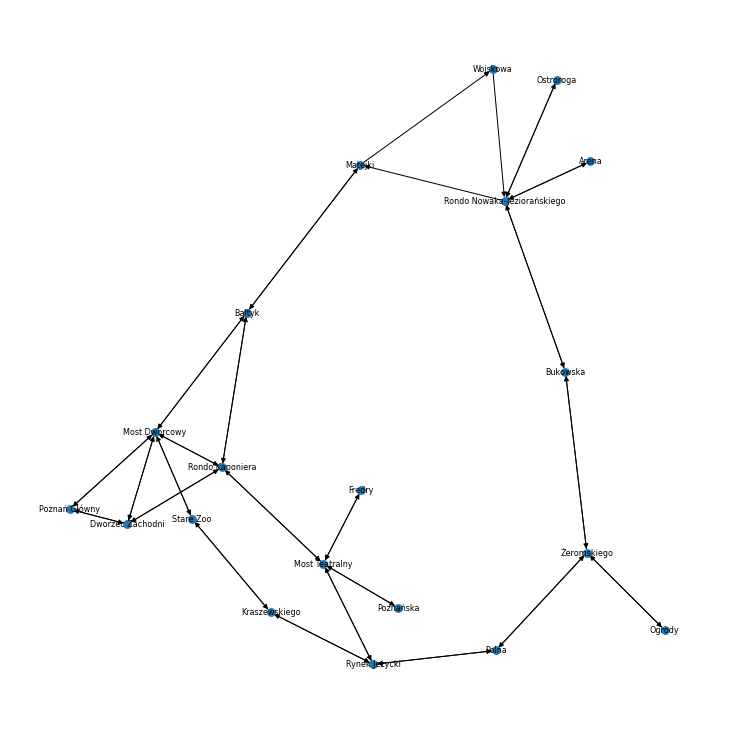

In [102]:
interesting_stops = [
    'Ogrody', 'Żeromskiego', 'Polna', 'Rynek Jeżycki', 'Kraszewskiego', 'Stare Zoo', 'Most Dworcowy',
    'Bałtyk', 'Rondo Kaponiera', 'Bukowska', 'Matejki', 'Wojskowa', 'Ostroroga', 'Rondo Nowaka-Jeziorańskiego', 
    'Arena', 'Most Teatralny', 'Poznańska', 'Fredry', 'Zamek', 'Dworzec Zachodni', 'Most Dworcowy', 'Poznań Główny',
]

G_sub_tram = G_tram.subgraph(interesting_stops)

display(pd.DataFrame(nx.adjacency_matrix(G_sub_tram).todense(), index=list(G_sub_tram.nodes), columns=list(G_sub_tram.nodes)))

for t in networkx_pagerank(G_sub_tram):
    print(t)

nx.draw(G_sub_tram, with_labels=True, node_size=60, font_size=8)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,10)

**Answer the question:**

1. [2p] Why *Żeromskiego* has a comparable (or even higher) PageRank as *Rondo Kaponiera*?
2. [4p] Suggest a modification of the PageRank algorithm that would take into account the number of lines that pass between neighboring stops. Describe which elements of the algorithm you would change for this purpose.

1. Although less pages link to Żeromskiego page, it also has less neighbours that it points to, resulting in smaller dilution of it's pagerank than of Rondo Kaponiera node.

2. If I understand the question correctly, I would design random walk implementation in such a way, that on each iteration (one walk) I would add dampening paramter delta that would lower the value of nodes the further the algorithm would go. In this way for example Most Dworcowy would gave less power to nodes far away. 

### Task 7 - TrustRank algorithm implementation [3p]

Use the PageRank implementation from the *stochastic matrix approach*. The only change from PageRank implementation is the assumption, that in the TrustRank, jump to *any* page always ends in one of the trusted pages. It is also necessary to provide a list of trusted nodes. Modify the mathematical formula and the implementation of the algorithm in such way. 

In [51]:
def trustrank(graph: nx.DiGraph, trusted_nodes: list, alpha: float = 0.85, epsilon: float = 0.0000001) -> list:
    nodes = graph.nodes

    v_start = np.array([[1/len(trusted_nodes)] if x in trusted_nodes else [0] for x in range(0, len(nodes))])
    v = np.copy(v_start)
    M = nx.adjacency_matrix(graph).todense().T
    with np.errstate(divide='ignore', invalid='ignore'): # Some collumns contain only zeroes.
        M = M / np.sum(M, axis=0)# normalizing adjacency_matrix column wise
    M[np.isnan(M)] = 0

    for _ in range(0, 1000):

        new_v = ((1-alpha) * v_start) + (alpha * (M@v))

        # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
        # The Frobenius norm
        distance = np.linalg.norm(v - new_v, ord='fro')
        v = new_v
        if distance < epsilon:
#             print("When stopped:", _)
            break
    
    list_of_sets = [(index, value) for index, value in zip(range(0, len(v)), v.tolist())]
    list_of_sets = sorted(list_of_sets, key=lambda v:(v[1],v[0]), reverse=True)
    return list_of_sets
        

print(trustrank(G_random, [0, 2]))
# nx.draw(G_random, with_labels=True)

[(9, [0.1695314868910835]), (2, [0.1429382576421888]), (0, [0.12682904077974522]), (1, [0.11742327079070586]), (3, [0.051480998343433185]), (7, [0.04990490761952685]), (8, [0.028176700159355545]), (5, [0.016221447554435987]), (6, [0.00961856283212686]), (4, [0.005082217668168307])]


[0, 1, 2, 3, 4, 5, 6]
[[0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1]
 [1 0 1 0 1 0 0]]


[(1, [0.29079083638720327]),
 (5, [0.2471722084277122]),
 (2, [0.13481187457116023]),
 (6, [0.10504821681708582]),
 (4, [0.10476365775407442]),
 (3, [0.08764954828868962]),
 (0, [0.029763657754074416])]

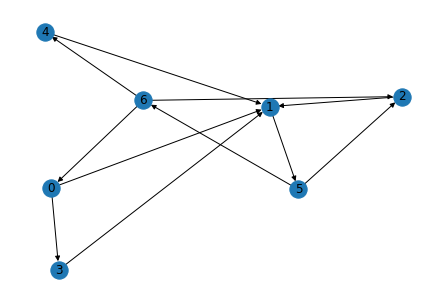

In [54]:
G_trustrank = nx.DiGraph()

G_trustrank.add_nodes_from(range(7))

G_trustrank.add_edge(0, 1)
G_trustrank.add_edge(2, 1)
G_trustrank.add_edge(3, 1)
G_trustrank.add_edge(4, 1)
G_trustrank.add_edge(1, 5)
G_trustrank.add_edge(5, 2)
G_trustrank.add_edge(5, 6)
G_trustrank.add_edge(6, 0)
G_trustrank.add_edge(6, 2)
G_trustrank.add_edge(0, 3)
G_trustrank.add_edge(6, 4)
    
print(G_trustrank.nodes)
print(nx.adjacency_matrix(G_trustrank).todense())
nx.draw(G_trustrank, with_labels=True)

trustrank(G_trustrank, [3, 4])

### Task 8 - TrustRank example [4p]

For the *G_trustrank* graph above, assume that good pages are 3 and 4.

**Answer the questions:**

1. [2p] Why do good pages (3, 4) achieve one of the lowest ratings in the graph?
2. [2p] How can you change it?

1. Not intuitively, they have very low score, because no trusted page links to them (including themselves). Trustrank rewards site that are linked to by trusted pages, that's why node 1 has the highest score (many trusted pages link to it). 
2. There are many ways to change it, for istance I could add some other trusted nodes, or I could add an link connecting page 3 and 4.

[0, 1, 2, 3, 4, 5, 6]
[[0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 0 0 1]
 [1 0 1 0 1 0 0]]


[(1, [0.24386754627611545]),
 (5, [0.2072873963845818]),
 (4, [0.16640050290109776]),
 (3, [0.15632858453095771]),
 (2, [0.1130579849536236]),
 (6, [0.08809712379712788]),
 (0, [0.024960861156495737])]

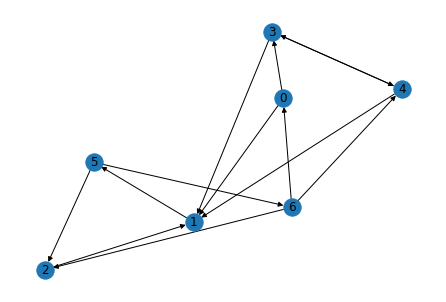

In [96]:
# For example lets add a connection between trusted nodes:
G_trustrank = nx.DiGraph()
G_trustrank.add_nodes_from(range(7))
G_trustrank.add_edge(0, 1)
G_trustrank.add_edge(2, 1)
G_trustrank.add_edge(3, 1)
G_trustrank.add_edge(4, 1)
G_trustrank.add_edge(1, 5)
G_trustrank.add_edge(5, 2)
G_trustrank.add_edge(5, 6)
G_trustrank.add_edge(6, 0)
G_trustrank.add_edge(6, 2)
G_trustrank.add_edge(0, 3)
G_trustrank.add_edge(6, 4)

# Adding a connection.
G_trustrank.add_edge(3,4)
G_trustrank.add_edge(4,3)
    
print(G_trustrank.nodes)
print(nx.adjacency_matrix(G_trustrank).todense())
nx.draw(G_trustrank, with_labels=True)

trustrank(G_trustrank, [3, 4])

### Task 9 - HITS algorithm implementation [5p]

Implement HITS algorithm. You can choose whether to use the iterative version or using the eigenvector. Return the results in the form of two lists of tuples (similar to PageRank and TrustRank, but in two separate lists - authorities and hubs). In case of iterative approach, normalize the vector after each iteration (sum up to 1).

In [64]:
def hits(graph: nx.DiGraph, epsilon: float = 0.0000001) -> list:
    nodes = list(graph.nodes)
    L = nx.adjacency_matrix(graph).todense()
    L_t = nx.adjacency_matrix(graph).todense().T
    N = len(nodes)
    hubs = auths = np.ones(N)/N

    for _ in range(0, 100):
        new_hubs = hubs @ L @ L_t
        new_hubs = new_hubs / np.sum(new_hubs)
        
        new_auths  = auths @ L_t @ L 
        new_auths = new_auths / np.sum(new_auths)
        
        distance_hubs = np.linalg.norm(new_hubs - hubs)
        distance_auths  = np.linalg.norm(new_auths - auths)
        
        auths = new_auths
        hubs = new_hubs
        
        if distance_hubs < epsilon and distance_auths < epsilon:
            break
            
    
    hubs = np.array(hubs.flatten())[0,]
    auths = np.array(auths.flatten())[0,]
    h = [(nodes[i], hubs[i]) for i in range(0, len(hubs))]
    a = [(nodes[i], auths[i]) for i in range(0, len(auths))]
    
    return h,a

h, a  = hits(G_deathend)
h_nx, a_nx = nx.hits(G_deathend)
print(h, a)
print(h_nx, a_nx)

[(0, 0.12663930738230514), (1, 0.12663930738230514), (2, 0.10532506411216563), (3, 0.057137551747960175), (4, 0.10532506411216563), (5, 0.037510118034817935), (6, 0.003998045276494857), (7, 0.19214301774015846), (8, 0.1226412621058135), (9, 0.1226412621058135), (10, 0.0)] [(0, 0.020372012476415045), (1, 0.0), (2, 0.1484262923039511), (3, 0.0), (4, 0.0), (5, 0.05169302333272286), (6, 0.5366831075852802), (7, 0.05169302333272286), (8, 0.17076052849249282), (9, 0.0019622237121442953), (10, 0.01840978876427075)]
{0: 0.12663930676884155, 1: 0.12663930676884155, 2: 0.1053250664413834, 3: 0.05713754899387663, 4: 0.1053250664413834, 5: 0.0375101123529201, 6: 0.00399804292436797, 7: 0.19214302161943847, 8: 0.12264126384447355, 9: 0.12264126384447355, 10: -0.0} {0: 0.02037199964095117, 1: -0.0, 2: 0.1484262948435571, 3: -0.0, 4: -0.0, 5: 0.05169302758441469, 6: 0.5366831363038003, 7: 0.05169302758441469, 8: 0.17076051440191084, 9: 0.0019622199174025236, 10: 0.018409779723548642}


### Task 10 - HITS analysis [5p]

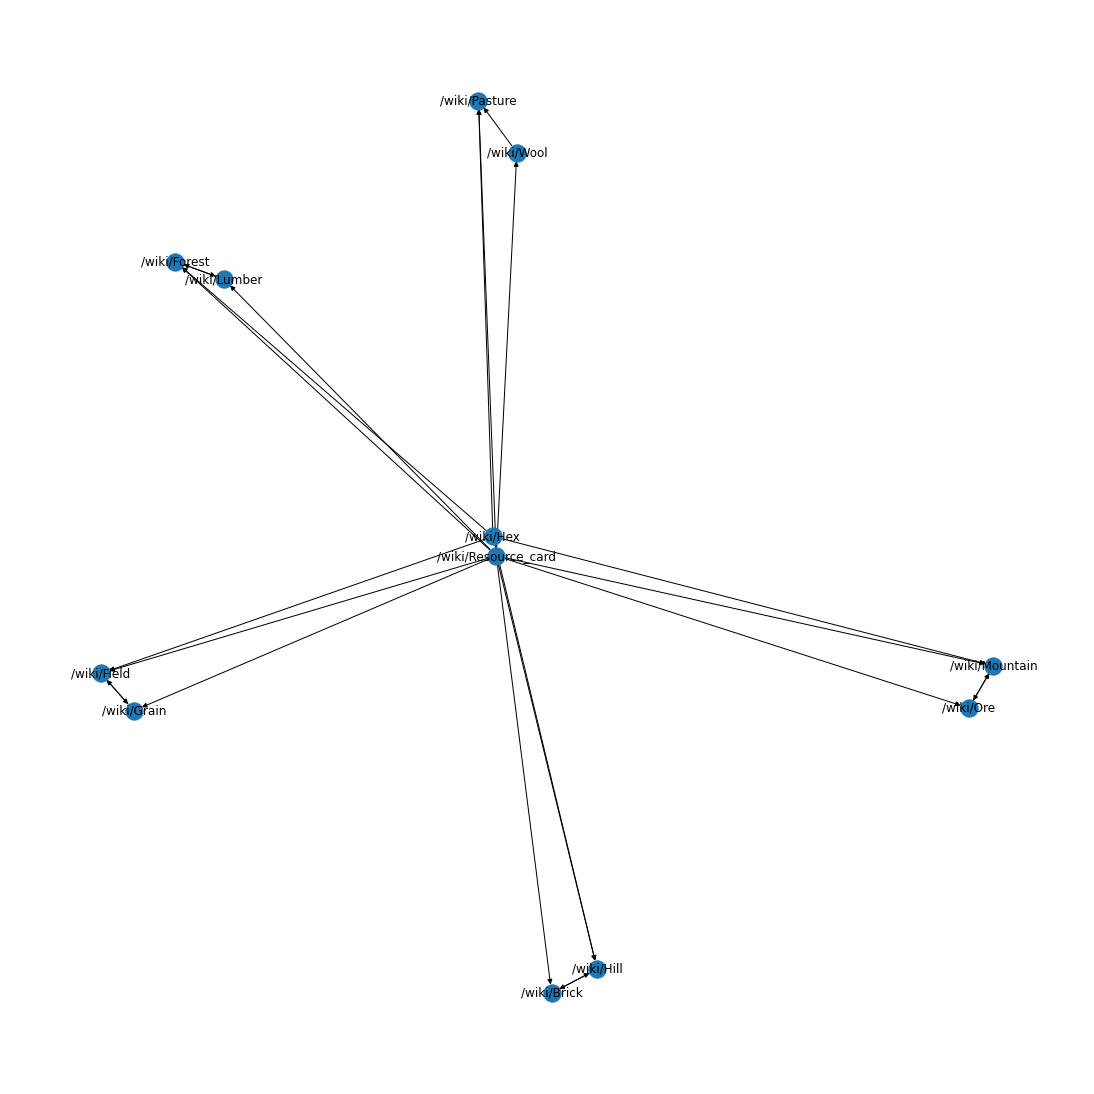

In [90]:
import matplotlib
interesting_pages = [
    '/wiki/Hex', '/wiki/Resource_card', # A place from which to get a resource, Resource
    '/wiki/Forest', '/wiki/Lumber', 
    '/wiki/Hill', '/wiki/Brick',
    '/wiki/Pasture', '/wiki/Wool', 
    '/wiki/Field', '/wiki/Grain', 
    '/wiki/Mountain', '/wiki/Ore',
]

G_sub_res = G_catan.subgraph(interesting_pages)

nx.draw(G_sub_res, with_labels=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 15)

In [66]:
hits(G_sub_res)

([('/wiki/Mountain', 0.030067397680563077),
  ('/wiki/Pasture', 0.0),
  ('/wiki/Forest', 0.030067397680563077),
  ('/wiki/Hill', 0.030067397680563077),
  ('/wiki/Hex', 0.24384505638015935),
  ('/wiki/Brick', 0.04876901127603187),
  ('/wiki/Field', 0.030067397680563077),
  ('/wiki/Wool', 0.04876901127603187),
  ('/wiki/Ore', 0.04876901127603187),
  ('/wiki/Grain', 0.04876901127603187),
  ('/wiki/Resource_card', 0.39204029651742894),
  ('/wiki/Lumber', 0.04876901127603187)],
 [('/wiki/Mountain', 0.12439795308154834),
  ('/wiki/Pasture', 0.12439795308154833),
  ('/wiki/Forest', 0.12439795308154834),
  ('/wiki/Hill', 0.12439795308154833),
  ('/wiki/Hex', 0.0),
  ('/wiki/Brick', 0.07669466349997268),
  ('/wiki/Field', 0.12439795308154834),
  ('/wiki/Wool', 0.07123158059236774),
  ('/wiki/Ore', 0.07669466349997268),
  ('/wiki/Grain', 0.07669466349997268),
  ('/wiki/Resource_card', 0.0),
  ('/wiki/Lumber', 0.07669466349997268)])

**Answer the question:**

1. [2p] Replace Hex with Resource_hex again. What has changed in the results for HITS and why?

([('/wiki/Mountain', 0.04080127992619001),
  ('/wiki/Pasture', 0.0),
  ('/wiki/Forest', 0.04080127992619001),
  ('/wiki/Hill', 0.04080127992619001),
  ('/wiki/Brick', 0.032834353307423764),
  ('/wiki/Resource_hex', 0.34432456617352386),
  ('/wiki/Field', 0.04080127992619001),
  ('/wiki/Wool', 0.032834353307423764),
  ('/wiki/Ore', 0.032834353307423764),
  ('/wiki/Grain', 0.032834353307423764),
  ('/wiki/Resource_card', 0.32829854758459753),
  ('/wiki/Lumber', 0.032834353307423764)],
 [('/wiki/Mountain', 0.09330043921730877),
  ('/wiki/Pasture', 0.09330043921730877),
  ('/wiki/Forest', 0.09330043921730877),
  ('/wiki/Hill', 0.09330043921730877),
  ('/wiki/Brick', 0.09435410651875777),
  ('/wiki/Resource_hex', 0.02158472907161457),
  ('/wiki/Field', 0.09330043921730877),
  ('/wiki/Wool', 0.08895792425085412),
  ('/wiki/Ore', 0.09435410651875777),
  ('/wiki/Grain', 0.09435410651875777),
  ('/wiki/Resource_card', 0.04553872451595637),
  ('/wiki/Lumber', 0.09435410651875777)])

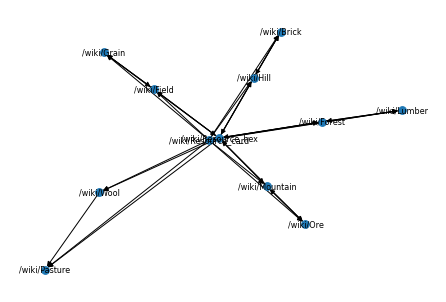

In [93]:
interesting_pages = [
    '/wiki/Resource_hex', '/wiki/Resource_card', # A place from which to get a resource, Resource
    '/wiki/Forest', '/wiki/Lumber', 
    '/wiki/Hill', '/wiki/Brick',
    '/wiki/Pasture', '/wiki/Wool', 
    '/wiki/Field', '/wiki/Grain', 
    '/wiki/Mountain', '/wiki/Ore',
]

G_sub_res = G_catan.subgraph(interesting_pages)

nx.draw(G_sub_res, with_labels=True, node_size=60, font_size=8)
hits(G_sub_res)
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(15, 15)

1. Both scores for hubs and authorites are very simillar. Authorities score for 0,1,2,3,4 rose dramatically, because Resources_hex contrary to Hex links to them. 
The one node that is different than other is Resource_hex, it is a good hub because it link to many good authorities, but it is a bad authority, because there aren't any good hubs linking to it.
Authority of resources rose, because Resource hex points to all resource, while the Hex points only to Resource hexes.

------

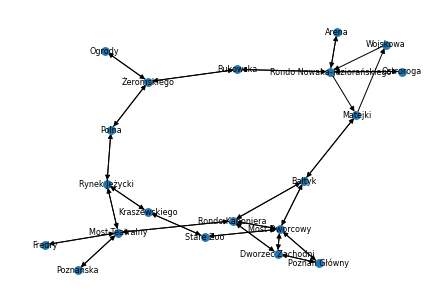

In [43]:
nx.draw(G_sub_tram, with_labels=True, node_size=60, font_size=8) 

In [56]:
hits(G_sub_tram)

([(0, 0.019339415488559084),
  (1, 0.007674958073889476),
  (2, 0.00025093647713938784),
  (3, 0.00025093647713938784),
  (4, 0.00025093647713938784),
  (5, 0.03685399837994114),
  (6, 0.09470139475898263),
  (7, 0.03114133693298002),
  (8, 0.06369736885854912),
  (9, 0.0015863109287749218),
  (10, 0.1310664203100124),
  (11, 0.15286408766111773),
  (12, 0.012949790942074305),
  (13, 0.11458227933860586),
  (14, 0.022798092544534885),
  (15, 0.00183724740591431),
  (16, 0.039158407102920595),
  (17, 0.17299909180013928),
  (18, 0.022798092544534885),
  (19, 0.07319889749705126)],
 [(0, 0.0007964504636102861),
  (1, 0.005034805617299098),
  (2, 0.0059468506265917),
  (3, 0.0059468506265917),
  (4, 0.012041162739586431),
  (5, 0.036066591841724234),
  (6, 0.09349981037019779),
  (7, 0.03091940802666151),
  (8, 0.06277296595342945),
  (9, 0.0023600369371822557),
  (10, 0.1293231104722578),
  (11, 0.151242334689952),
  (12, 0.013692583848889934),
  (13, 0.11224370849151248),
  (14, 0.02250

**Answer the question:**

2. [3p] Why are the results for Authorities and Hubs very similar?

2. Every connection goes both way, so the adjacency matrix is symmetric. So the equation for hubs and auths is the same. Eigen vectors are the same, this results in Authorities and Hubs very similar.